In [1]:
import xarray as xr
import pandas as pd

In [2]:
ds = xr.open_mfdataset('../output_monthly/2016fh_16j_airports_0pt1degree_month_*.ncf', concat_dim = 'time', combine = 'nested')

In [3]:
ds1 = xr.open_dataset('../NEI11_0.1x0.1_201101_monmean_egu.nc')

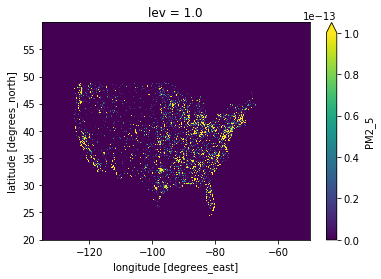

In [57]:
ds['PM2_5'].mean(dim = 'time').plot(vmax = 1e-13)

In [97]:
ds['time'] = pd.date_range(start='1/1/2016', end='1/01/2017', freq = 'm')

In [ ]:
areaf = cdo.gridarea(llpath, input='-remapnn,%s -stdatm,0' % llpath, options='-f nc4', returnCdf=True)
area = areaf.variables['cell_area'][:]

In [105]:
def ton_day_to_kg_sec(val):
    sec_hour = 3600
    hour_day = 24
    day_year_leap = 366
    ton_kg = 0.00110231 #short tons per kg
    conv_val = val * sec_hour * hour_day * day_year_leap * ton_kg
    return(conv_val)

In [106]:
ton_day_to_kg_sec(ds['PNO3'])


<xarray.DataArray 'PNO3' (time: 12, lev: 1, lat: 400, lon: 850)>
dask.array<mul, shape=(12, 1, 400, 850), dtype=float32, chunksize=(1, 1, 400, 850)>
Coordinates:
  * lev      (lev) float64 1.0
  * lat      (lat) float32 20.0 20.1 20.2 20.3 20.4 ... 59.5 59.6 59.7 59.8 59.9
  * lon      (lon) float32 -135.0 -134.9 -134.8 -134.7 ... -50.3 -50.2 -50.1
  * time     (time) datetime64[ns] 2016-01-31 2016-02-29 ... 2016-12-31

### Import reference data

In [60]:
monthlycounty = pd.read_csv('2016fh_county_monthly_report_22jan2020_v0.csv', comment='#')

In [91]:
month_abbrev = ['jan','feb','mar','apr','may','jun','jul','aug','sep','nov','dec']
month_value = [f'{month}_value' for month in month_abbrev]
month_value.append('ann_value')

In [94]:
monthly_total_ref = monthlycounty.groupby(['country_cd', 'poll']).sum().droplevel('country_cd')[month_value]